# **Mileage Prediction - Regression Analysis**

## Objective :
To develop an AI/ML project using NumPy, pandas, Matplotlib, and Seaborn to predict vehicle mileage (MPG) through regression analysis. Key goals include data preprocessing, feature selection, model training, evaluation, and potentially deployment for accurate MPG estimation, benefiting the automotive industry.

## Data Source :
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Import data**

In [4]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#**Data Pre-processing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#**Removing Missing values**

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


#**Data Visualization**

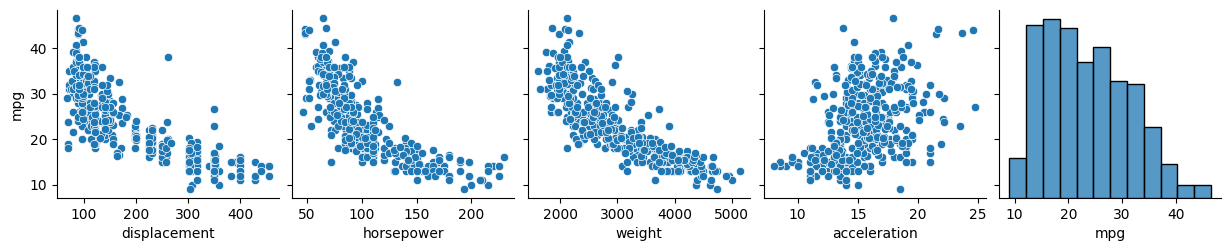

<Axes: xlabel='displacement', ylabel='mpg'>

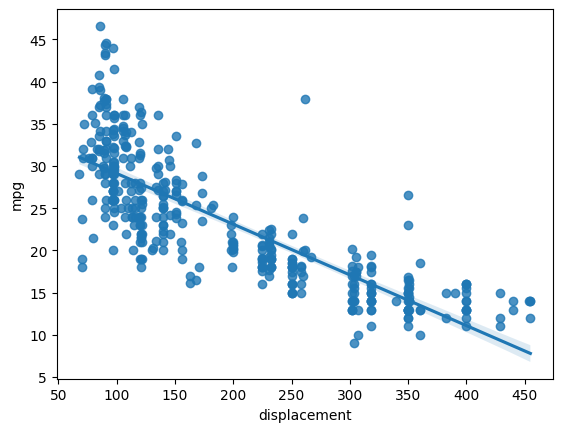

In [9]:
sns.pairplot(data=df, x_vars=['displacement','horsepower','weight','acceleration','mpg'], y_vars='mpg')
plt.show()
sns.regplot(x='displacement', y='mpg', data=df)

#**Define Target Variable y and features X**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y=df['mpg']

In [13]:
X=df[['acceleration','displacement','horsepower','weight']]

In [14]:
y.shape


(392,)

In [15]:
X.shape

(392, 4)

In [16]:
X

,acceleration,displacement,horsepower,weight
0,12.0,307.0,130.0,3504
1,11.5,350.0,165.0,3693
2,11.0,318.0,150.0,3436
3,12.0,304.0,150.0,3433
4,10.5,302.0,140.0,3449
...,...,...,...,...
393,15.6,140.0,86.0,2790
394,24.6,97.0,52.0,2130
395,11.6,135.0,84.0,2295
396,18.6,120.0,79.0,2625


#**Scaling Data**

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-1.285258  ,  1.07728956,  0.66413273,  0.62054034],
       [-1.46672362,  1.48873169,  1.57459447,  0.84333403],
       [-1.64818924,  1.1825422 ,  1.18439658,  0.54038176],
       ...,
       [-1.4304305 , -0.56847897, -0.53247413, -0.80463202],
       [ 1.11008813, -0.7120053 , -0.66254009, -0.41562716],
       [ 1.40043312, -0.72157372, -0.58450051, -0.30364091]])

In [18]:
pd.DataFrame(X).describe()


,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,4.350262e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-2.736983e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00
25%,-6.410551e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01
50%,-1.499869e-02,-4.153842e-01,-2.853488e-01,-2.052109e-01
75%,5.384714e-01,7.782764e-01,5.600800e-01,7.510927e-01
max,3.360262e+00,2.493416e+00,3.265452e+00,2.549061e+00


##Observe that after scaling Mean is 0 and std is 1

#**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 4), (98, 4), (294,), (98,))

#**Linear Rgression**

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.intercept_


23.464404729340036

In [22]:
lr.coef_


array([-0.16529152, -0.82134735, -2.00007128, -4.12715281])

###**Mileage=23.464-0.165 * acceleration-0.821 * displacement -2 *  horsepower-4.127 * weight + error**

#**Predict test data**

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

#**Model Accuracy**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)

3.212819357278418

In [25]:
mean_absolute_percentage_error(y_test, y_pred)


0.14486145216628082

In [26]:
r2_score(y_test, y_pred)


0.7174961864188241

#**Polynomial Regression**

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
lr.fit(X_train2, y_train)

LinearRegression()

In [28]:
lr.intercept_

21.295474126506164

In [29]:
lr.coef_

array([-1.14970885, -2.78636354, -5.39053361, -1.15797282, -0.03040911,
       -0.67580641,  0.78299062,  1.35645181, -0.16432177,  1.09523004])

In [32]:
y_pred_poly = lr.predict(X_test2)
y_pred_poly

array([15.3424206 , 13.80529141, 13.7611191 , 25.23440119, 30.8500016 ,
       22.8214166 , 24.44326033, 22.77725527, 14.4517352 , 13.29745578,
       26.33345914, 28.57631455, 34.28377781, 33.21582057, 18.06492635,
       17.50428695, 27.67974706, 34.53732991, 33.37592178, 26.84131714,
       16.77931993, 21.27586482, 24.43775202, 35.54533291, 18.98713019,
       15.27459558, 19.88833577, 16.06210339, 25.5852406 , 14.81435268,
       21.32931778, 15.14144105, 10.49915151, 31.61768232, 18.99012478,
       30.31186033, 22.13747083, 20.98017372, 13.11789251, 13.69675299,
       19.79907363, 17.23382203, 14.9026489 , 16.0416498 , 21.32464492,
       30.82739924, 13.05538523, 25.6070922 , 27.69730155, 19.84939131,
       21.16671205, 13.98256218, 23.39608221, 31.85117682, 12.91542324,
       14.99583272, 27.87012511, 21.27950334, 17.50703747, 32.71981844,
       19.77438987, 25.5285552 , 21.7624034 , 13.56452156, 21.58952215,
       25.52096262, 13.92803124, 23.04503717, 31.85078614, 13.98

#**Model Accuracy**

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred_poly)

2.6281657513434173

In [34]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.11292169321652235

In [35]:
r2_score(y_test, y_pred_poly)

0.7705431136534491

#**Random forest Regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([16.722 , 15.829 , 14.437 , 24.942 , 31.503 , 20.568 , 26.335 ,
       21.607 , 15.025 , 12.88  , 31.424 , 32.444 , 36.694 , 31.626 ,
       16.547 , 17.402 , 28.669 , 35.266 , 32.916 , 27.337 , 15.914 ,
       19.422 , 20.642 , 29.437 , 20.298 , 12.95  , 20.059 , 15.01  ,
       22.657 , 13.985 , 19.658 , 16.522 , 13.067 , 30.526 , 16.604 ,
       29.24  , 21.395 , 19.998 , 12.7   , 14.593 , 18.636 , 16.59  ,
       12.1   , 15.535 , 19.287 , 29.876 , 14.065 , 27.934 , 26.735 ,
       19.873 , 18.573 , 17.781 , 23.112 , 34.652 , 12.645 , 14.315 ,
       28.23  , 18.402 , 19.194 , 34.157 , 19.49  , 27.97  , 19.615 ,
       14.983 , 23.438 , 26.71  , 13.849 , 21.078 , 35.94  , 14.253 ,
       25.729 , 19.86  , 12.36  , 36.516 , 34.14  , 28.511 , 35.79  ,
       12.709 , 29.491 , 14.5185, 26.107 , 29.669 , 15.105 , 33.218 ,
       33.048 , 34.491 , 14.339 , 25.853 , 28.143 , 30.123 , 36.06  ,
       31.278 , 32.398 , 35.306 , 19.779 , 29.875 , 26.656 , 26.985 ])

#**Model Accuracy**

In [39]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

2.6156989795918375

In [40]:
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_rf

0.11242920415316997

In [41]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf

0.7635645378538929

# **Explanation and Conclusion**
This project involved data preprocessing to ensure data quality, data visualization for insights, and a robust prediction model for accurate vehicle mileage estimation. It holds promise for automotive applications.

A well-prepared dataset, insightful visualization, and a strong prediction model make this project valuable for automotive research and design.